In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from skopt.space import Integer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
DC = np.load('../Bases/Criados/Treino_Teste/treino_teste.npz', allow_pickle=True)
X_treino, X_teste, y_treino, y_teste, feature_names = DC['X_treino'], DC['X_teste'], DC['y_treino'], DC['y_teste'], list(DC['feature_names'])

In [22]:
len(X_treino)

14345

In [23]:
DC_over = np.load('../Bases/Criados/Treino_Teste/over.npz', allow_pickle=True)
X_treino_over, X_teste_over, y_treino_over, y_teste_over, feature_names= DC_over['X_treino'], DC_over['X_teste'], DC_over['y_treino'], DC_over['y_teste'], list(DC_over['feature_names'])

In [24]:
len(X_treino_over)

27102

In [25]:
DC_under = np.load('../Bases/Criados/Treino_Teste/under.npz', allow_pickle=True)
X_treino_under, X_teste_under, y_treino_under, y_teste_under, feature_names = DC_under['X_treino'], DC_under['X_teste'], DC_under['y_treino'], DC_under['y_teste'], list(DC_under['feature_names'])

In [26]:
len(X_treino_under)

14091

In [27]:
DC_random_under = np.load('../Bases/Criados/Treino_Teste/random.npz', allow_pickle=True)
X_treino_rd_under, X_teste_rd_under, y_treino_rd_under, y_teste_rd_under, feature_names = DC_random_under['X_treino'], DC_random_under['X_teste'], DC_random_under['y_treino'], DC_random_under['y_teste'], list(DC_random_under['feature_names'])

In [28]:
len(X_treino_rd_under)

1588

In [29]:
DC_DSTO = np.load('../Bases/Criados/Treino_Teste/dsto.npz', allow_pickle=True)
X_treino_DSTO, X_teste_DSTO, y_treino_DSTO, y_teste_DSTO, feature_names = DC_DSTO['X_treino'], DC_DSTO['X_teste'], DC_DSTO['y_treino'], DC_DSTO['y_teste'], list(DC_DSTO['feature_names'])

In [30]:
len(X_treino_DSTO)

27102

## Parametros e funcoes

In [31]:
param_bayes = {
    'criterion':  ['gini', 'entropy'],
    'max_depth': Integer(1, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10),
    'n_estimators': Integer(50, 120),
    'max_features': Integer(2, 5)
}

# Modelos

### Modelo Padrao

In [32]:
bayes_search = BayesSearchCV(RandomForestClassifier(), param_bayes, n_iter=50, cv=5, scoring='accuracy', random_state=42)
bayes_search.fit(X_treino, y_treino)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'gini', 'max_depth': 37, 'max_features': 5, 'min_samples_leaf': 4, 'min_samples_split': 14, 'n_estimators': 79})
Melhor pontuação de validação cruzada: 0.94


In [33]:
best_model_bayes = bayes_search.best_estimator_

### Resultados

In [34]:
previsoes_bayes = best_model_bayes.predict(X_teste)
accuracy_bayes = accuracy_score(y_teste, previsoes_bayes)
print("Acurácia do melhor modelo (BayesSearchCV) no conjunto de teste: {:.2f}".format(accuracy_bayes))

Acurácia do melhor modelo (BayesSearchCV) no conjunto de teste: 0.94


In [35]:
print(classification_report(y_teste, previsoes_bayes))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       359
         2.0       0.94      1.00      0.97      5789

    accuracy                           0.94      6148
   macro avg       0.47      0.50      0.48      6148
weighted avg       0.89      0.94      0.91      6148



c:\Users\llays\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\llays\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\llays\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

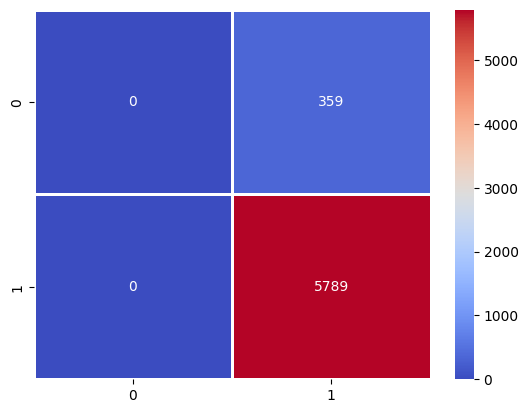

In [36]:
cfm_matrix = confusion_matrix(y_teste,previsoes_bayes)
sns.heatmap(cfm_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

Variáveis mais relevantes:
P00104: 0.10956294451481363
P00404: 0.0992445773011242
V0001: 0.06959472552263386
P01101: 0.054903037134055414
P018: 0.04563669304426635
N011: 0.04386676594778778
Renda: 0.04076211491599572
N00101: 0.04050964665361557
N016: 0.04010334514233484
P04502: 0.038588271864005916
P02501: 0.03809220257831664
Escolaridade: 0.037322469554628375
Q03001: 0.02714278004725082
C009: 0.026547428539633967
Tempo_parou_fumar: 0.026343612002775105
Atividade_fisica_semanal: 0.02467632120255644
Inicio_tabagismo: 0.02216223528037647
P02001: 0.02149525006631107
Consumo_alcool: 0.020718709740267557
Carga_horaria_semanal: 0.01987592256209628
B001: 0.018601863252566027
Quant_trabalhos: 0.016959151546506956
P068: 0.015204214080510429
Q11006: 0.013493364776951995
Avaliacao_plano: 0.012673005783386478
Instituicao_plano: 0.01180057372771263
V0026: 0.011171959724262277
P02602: 0.0105742591214717
Q128: 0.010063505264244025
Cobertura_plano: 0.008779734003883669
T001: 0.007904461248979124
Inten

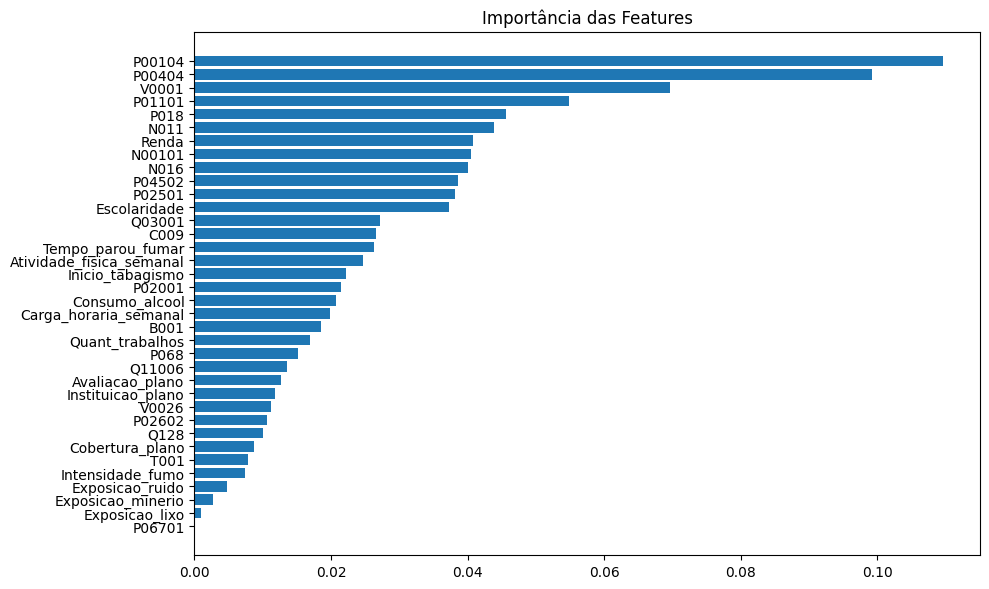

In [37]:
# Obter a importância das features
importancias = best_model_bayes.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = feature_names

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
nomes_array = np.array(nomes_das_features)
plt.yticks(range(X_treino.shape[1]), nomes_array[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()

### OverSampling

In [38]:
bayes_search.fit(X_treino_over, y_treino_over)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'gini', 'max_depth': 44, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50})
Melhor pontuação de validação cruzada: 0.97


In [39]:
best_model_bayes = bayes_search.best_estimator_

In [40]:
previsoes_bayes = best_model_bayes.predict(X_teste_over)

In [41]:
print(classification_report(y_teste_over, previsoes_bayes))

              precision    recall  f1-score   support

         1.0       0.32      0.02      0.04       359
         2.0       0.94      1.00      0.97      5789

    accuracy                           0.94      6148
   macro avg       0.63      0.51      0.51      6148
weighted avg       0.91      0.94      0.91      6148



Variáveis mais relevantes:
N011: 0.08634142050349858
N00101: 0.07991111378498991
N016: 0.05811071556604201
P01101: 0.046276562719912845
Quant_trabalhos: 0.043309272685004195
P00104: 0.042099554848795406
P018: 0.04137455269741867
Q03001: 0.04081328339105311
P00404: 0.040368975524371846
B001: 0.03773449883925708
P04502: 0.034165875611568246
V0026: 0.031350287374360866
C009: 0.031320901189362156
V0001: 0.03029092840209024
P02501: 0.028638444819412835
Carga_horaria_semanal: 0.025452752448012393
Escolaridade: 0.02418865792075623
Q128: 0.02388813616351301
Atividade_fisica_semanal: 0.02165817059072871
Q11006: 0.021342509626044594
Tempo_parou_fumar: 0.020785343783864
Consumo_alcool: 0.02044889531875254
Renda: 0.020394877726216877
P02001: 0.02011401836655696
Instituicao_plano: 0.019973463998244848
P068: 0.018261756446272093
Cobertura_plano: 0.015984547921351743
Intensidade_fumo: 0.01566690174461666
Inicio_tabagismo: 0.014686416760600033
T001: 0.012337593767930264
P02602: 0.01073287651030001
Ava

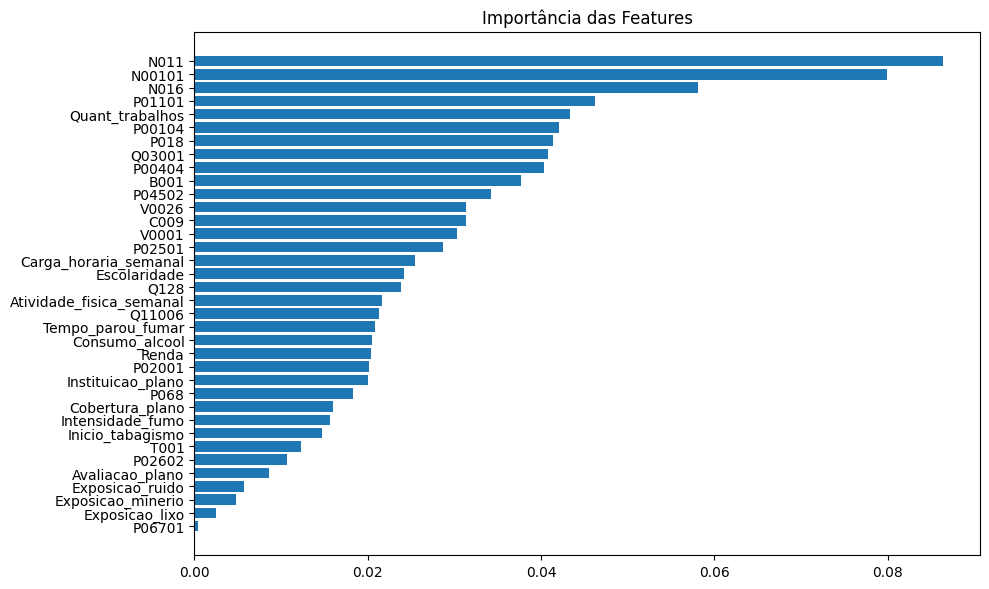

In [42]:
# Obter a importância das features
importancias = best_model_bayes.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = feature_names

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
nomes_array = np.array(nomes_das_features)
plt.yticks(range(X_treino.shape[1]), nomes_array[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()

### UnderSampling

In [43]:
bayes_search.fit(X_treino_under, y_treino_under)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'gini', 'max_depth': 37, 'max_features': 5, 'min_samples_leaf': 4, 'min_samples_split': 14, 'n_estimators': 79})
Melhor pontuação de validação cruzada: 0.94


In [44]:
best_model_bayes = bayes_search.best_estimator_

In [45]:
previsoes_bayes = best_model_bayes.predict(X_teste_under)

In [46]:
print(classification_report(y_teste_under, previsoes_bayes))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       359
         2.0       0.94      1.00      0.97      5789

    accuracy                           0.94      6148
   macro avg       0.47      0.50      0.48      6148
weighted avg       0.89      0.94      0.91      6148



c:\Users\llays\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\llays\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\llays\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Variáveis mais relevantes:
P00104: 0.11056265673646268
P00404: 0.09158394689927722
V0001: 0.07190006671178087
P01101: 0.05992442252670168
P018: 0.04531242531690883
N011: 0.044974756181362444
N00101: 0.04233633573686949
Renda: 0.037703400366702965
N016: 0.03741657437386372
P04502: 0.036385972008831695
P02501: 0.034417399657802245
Escolaridade: 0.033711212057473676
Q03001: 0.0288526986379523
C009: 0.02630289593258658
Tempo_parou_fumar: 0.02574867088187116
Atividade_fisica_semanal: 0.02473097416466596
Inicio_tabagismo: 0.02466797278145598
P02001: 0.024250439087340085
Consumo_alcool: 0.023743942120992883
B001: 0.021011743213930505
Carga_horaria_semanal: 0.019667300179751525
P068: 0.01666023738018569
Quant_trabalhos: 0.014757093828981122
Avaliacao_plano: 0.01425106056297156
V0026: 0.013495695616417643
Q11006: 0.01337697428668186
P02602: 0.011161480361664181
Instituicao_plano: 0.010338896056587435
Q128: 0.009492766874659532
Intensidade_fumo: 0.0074672123907392855
Cobertura_plano: 0.007328195

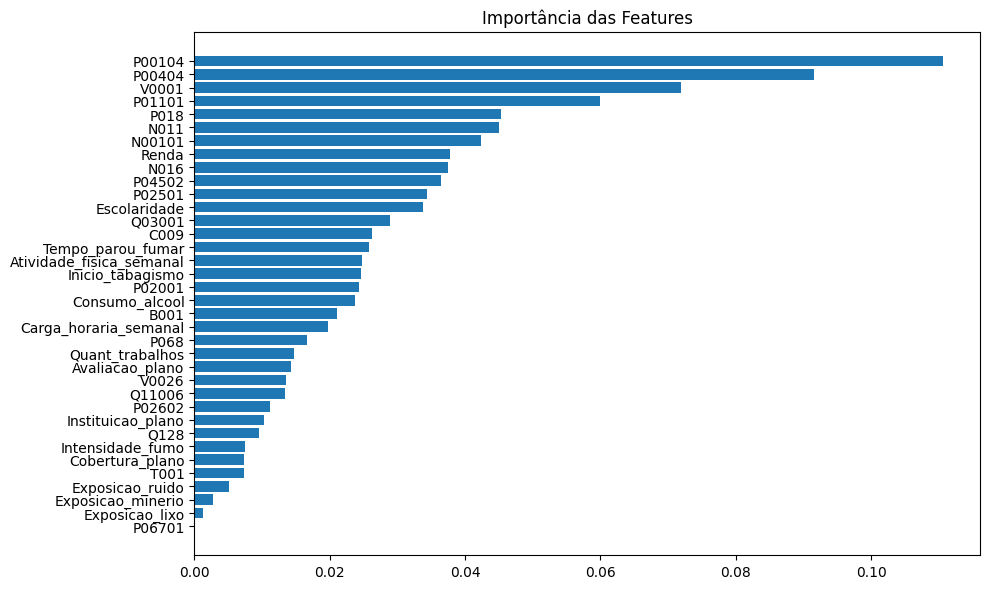

In [47]:
# Obter a importância das features
importancias = best_model_bayes.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = feature_names

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
nomes_array = np.array(nomes_das_features)
plt.yticks(range(X_treino.shape[1]), nomes_array[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()

### Random UnderSampling

In [48]:
bayes_search.fit(X_treino_rd_under, y_treino_rd_under)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'gini', 'max_depth': 14, 'max_features': 3, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 110})
Melhor pontuação de validação cruzada: 0.66


In [49]:
best_model_bayes = bayes_search.best_estimator_

In [50]:
previsoes_bayes = best_model_bayes.predict(X_teste_rd_under)

In [51]:
print(classification_report(y_teste_rd_under, previsoes_bayes))

              precision    recall  f1-score   support

         1.0       0.10      0.68      0.18       359
         2.0       0.97      0.64      0.77      5789

    accuracy                           0.64      6148
   macro avg       0.54      0.66      0.47      6148
weighted avg       0.92      0.64      0.73      6148



Variáveis mais relevantes:
N011: 0.0928185045104087
N00101: 0.07601694899975962
N016: 0.07337542528091724
P00104: 0.07074538287697091
P00404: 0.06308203928670476
Q03001: 0.04884298582330049
V0001: 0.046656794524442914
Tempo_parou_fumar: 0.04514448416088496
Carga_horaria_semanal: 0.03940700028449529
P018: 0.03849680643905503
P01101: 0.035680255854069934
Quant_trabalhos: 0.032752477325452
Renda: 0.0280389732674488
P04502: 0.026692890817722893
Inicio_tabagismo: 0.026585411875419757
Escolaridade: 0.02627792994630825
P02501: 0.025565076315381016
V0026: 0.025136963784801965
P02001: 0.02421421535073533
Consumo_alcool: 0.020255503536447558
Atividade_fisica_semanal: 0.016515564791670947
C009: 0.015547774114171598
Avaliacao_plano: 0.014325833237411274
Q11006: 0.012362211177096918
Cobertura_plano: 0.011998288941277671
P068: 0.0112839433159151
B001: 0.011251692145778668
Instituicao_plano: 0.009119482211573047
Intensidade_fumo: 0.007081543543623622
Exposicao_ruido: 0.006978394477441283
Exposicao_mi

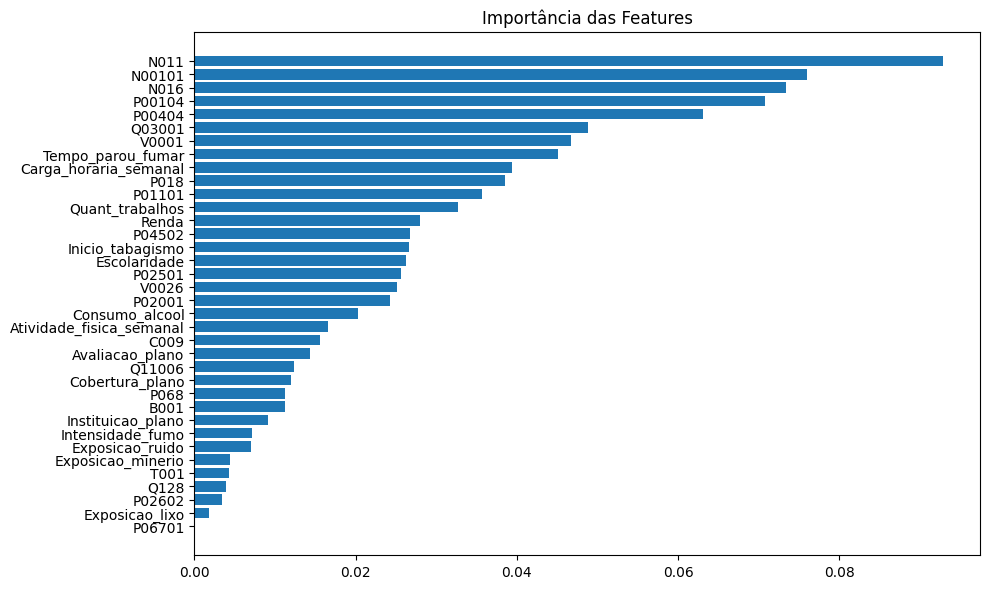

In [52]:
# Obter a importância das features
importancias = best_model_bayes.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = feature_names

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
nomes_array = np.array(nomes_das_features)
plt.yticks(range(X_treino.shape[1]), nomes_array[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()

### DSTO

In [53]:
bayes_search.fit(X_treino_DSTO, y_treino_DSTO)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'gini', 'max_depth': 37, 'max_features': 5, 'min_samples_leaf': 4, 'min_samples_split': 14, 'n_estimators': 79})
Melhor pontuação de validação cruzada: 0.97


In [54]:
best_model_bayes = bayes_search.best_estimator_

In [55]:
previsoes_bayes = best_model_bayes.predict(X_teste_DSTO)

In [56]:
print(classification_report(y_teste_DSTO, previsoes_bayes))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       359
         2.0       0.94      1.00      0.97      5789

    accuracy                           0.94      6148
   macro avg       0.47      0.50      0.48      6148
weighted avg       0.89      0.94      0.91      6148



c:\Users\llays\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\llays\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\llays\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Variáveis mais relevantes:
Intensidade_fumo: 0.12266307871505525
P018: 0.12202366213262114
Q11006: 0.10992068902153349
P06701: 0.10890272048767709
Inicio_tabagismo: 0.07285279001166713
P068: 0.07119523049486348
P02602: 0.06340429860180855
Instituicao_plano: 0.06265649984937839
Cobertura_plano: 0.0611251511851707
Q128: 0.05177050394113094
P04502: 0.031955117655920656
Q03001: 0.029738057399996125
Avaliacao_plano: 0.015642667883182925
N016: 0.013587553086462445
V0026: 0.012623368146663289
P02501: 0.009558616718070588
B001: 0.006927404848142904
N00101: 0.004633302559106681
P00104: 0.004036820873985305
Escolaridade: 0.0036842161158830104
P00404: 0.003533462133575828
V0001: 0.0025801421674458845
Atividade_fisica_semanal: 0.0025616245414556826
P01101: 0.0020772387382102736
N011: 0.0015194558941799645
Renda: 0.0014624802229966053
C009: 0.0010618193136482522
Tempo_parou_fumar: 0.0009225187159925093
P02001: 0.0008890056442576936
Exposicao_ruido: 0.0007965110853801849
Consumo_alcool: 0.0007749626

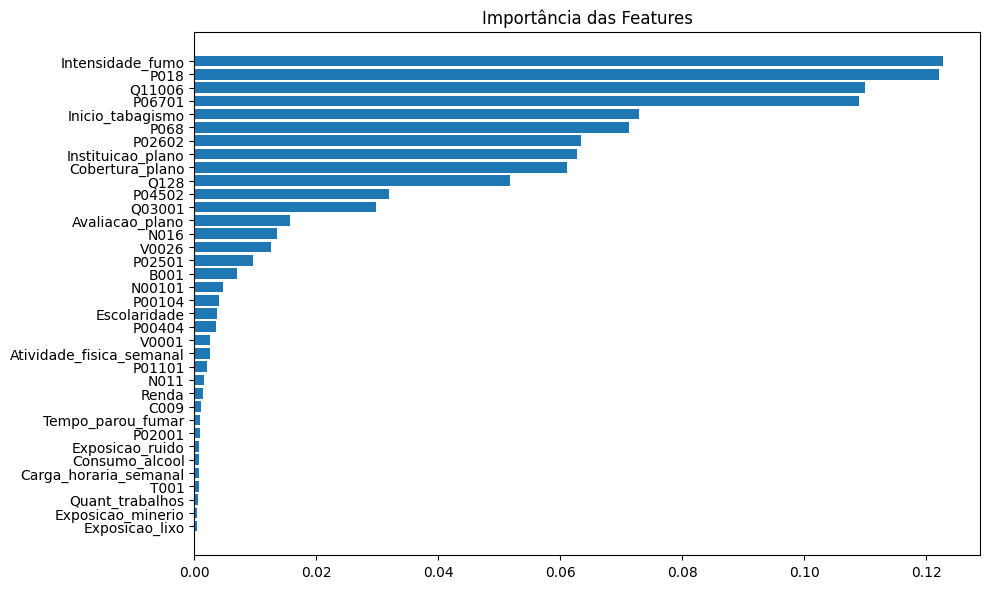

In [57]:
# Obter a importância das features
importancias = best_model_bayes.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = feature_names

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
nomes_array = np.array(nomes_das_features)
plt.yticks(range(X_treino.shape[1]), nomes_array[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()